# Second Homework

### First Research Question

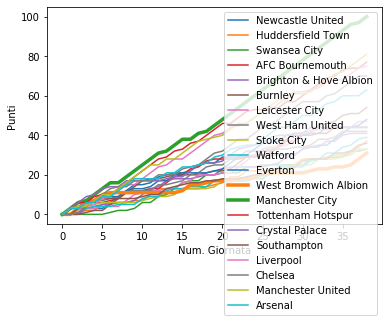

In [2]:
# importing libraries
import json
import pandas as pd
import matplotlib.pyplot as plt

result = {}; secResult = {}; teamsID = {}; dictApp = {}


# import and parsing files
teams = open("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\HM2\\file json\\teams.json")
teamsJS = json.loads(teams.read())
matches = pd.read_json("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\HM2\\file json\\matches_England.json")

# creating a first step result dictionary
for i in range(len(teamsJS)):
    if (teamsJS[i]["area"]["name"] == "England" or teamsJS[i]["area"]["name"] == "Wales") and teamsJS[i]["type"] != "national":
        result[teamsJS[i]["name"]] = [0]
        teamsID[teamsJS[i]["name"]] = teamsJS[i]["wyId"]
        secResult[teamsJS[i]["name"]] = [0, 0]
        dictApp[teamsJS[i]["name"]] = [0, 0]

# calculating points
dictMatches = matches.sort_values(by=["gameweek"])
for i in range(len(dictMatches["teamsData"])):
    l = list(dictMatches["teamsData"][i].keys())
    winner = dictMatches["winner"][i]
    if winner == 0:
        for sq in teamsID.keys():
            if teamsID[sq] == int(l[0]):
                result[sq].append(result[sq][len(result[sq]) - 1] + 1)
        for sq in teamsID.keys():
            if teamsID[sq] == int(l[1]):
                result[sq].append(result[sq][len(result[sq]) - 1] + 1)
    else:
        for sq in teamsID.keys():
            if teamsID[sq] == int(l[0]):
                if int(l[0]) == winner:
                    result[sq].append(result[sq][len(result[sq]) - 1] + 3)
                else:
                    result[sq].append(result[sq][len(result[sq]) - 1] + 0)
        for sq in teamsID.keys():
            if teamsID[sq] == int(l[1]):
                if int(l[1]) == winner:
                    result[sq].append(result[sq][len(result[sq]) - 1] + 3)
                else:
                    result[sq].append(result[sq][len(result[sq]) - 1] + 0)

# calculating series of victories and losses for each team
for sq, points in result.items():
    for i in range(len(points)-1):
        if points[i+1] == (points[i] + 3):
            dictApp[sq][0] += 1
            if dictApp[sq][1] != 0:
                if dictApp[sq][1] > secResult[sq][1]:
                    secResult[sq][1] = dictApp[sq][1]
                dictApp[sq][1] = 0
        if points[i+1] == points[i]:
            dictApp[sq][1] += 1
            if dictApp[sq][0] != 0:
                if dictApp[sq][0] > secResult[sq][0]:
                    secResult[sq][0] = dictApp[sq][0]
                dictApp[sq][0] = 0
        if points[i+1] == (points[i] + 1):
            if dictApp[sq][1] > secResult[sq][1]:
                secResult[sq][1] = dictApp[sq][1]
            dictApp[sq][1] = 0
            if dictApp[sq][0] > secResult[sq][0]:
                secResult[sq][0] = dictApp[sq][0]
            dictApp[sq][0] = 0

# finding the teams with the higtest series of wins and losses
sWin = ""; sLoss = ""; mWins = 0; mLosses = 0
for sq, series in secResult.items():
    if series[0] > mWins:
        mWins = series[0]
        sWin = sq
    if series[1] > mLosses:
        mLosses = series[1]
        sLoss = sq

# showing the result
plt.xlabel("Num. Giornata")
plt.ylabel("Punti")
for key, values in result.items():
    if key == sWin or key == sLoss:
        plt.plot(values, label=key, linewidth=3.5)
    else:
        plt.plot(values, label=key)
plt.legend()
plt.show()

### Third Research Question

The coaches database has two records related to "Antonio Conte", this modifies slightly the final distribution because there is a value that is doubled. 

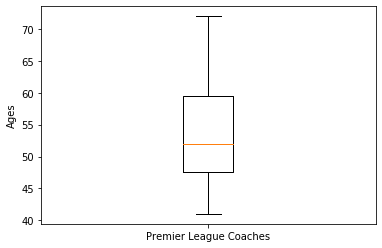

Newcastle United
Huddersfield Town
Swansea City
AFC Bournemouth
Burnley
Leicester City
Watford
Everton
Manchester City
Tottenham Hotspur


In [2]:
# importing libraries
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt

def calcolaEta(birthDate):
    today = datetime.date.today()
    birth = datetime.date(int(birthDate[0:4]), int(birthDate[5:7]), int(birthDate[8:]))
    return int((today - birth).total_seconds()//31536000)

resultPar = {}; resultDef = {}; teamsId = {}
barplotList = [[], []]

# this is the part of the assignment where we have to create the barplot in which we show the distribution of the
# ages of the coaches

# import and parsing files
teams = open("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\HM2\\file json\\teams.json")
teamsJS = json.loads(teams.read())
matches = pd.read_json("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\HM2\\file json\\matches_England.json")
coaches = open("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\HM2\\file json\\coaches.json")
coachesJS = json.loads(coaches.read())

# creating a first step result dictionary
for i in range(len(teamsJS)):
    if (teamsJS[i]["area"]["name"] == "England" or teamsJS[i]["area"]["name"] == "Wales") and teamsJS[i]["type"] != "national":
        resultPar[teamsJS[i]["name"]] = []
        resultDef[teamsJS[i]["name"]] = []
        teamsId[str(teamsJS[i]["wyId"])] = teamsJS[i]["name"]

# constructing a first part of the result
for i in range(len(matches)):
    cSqCasa = dict(list(matches["teamsData"][i].values())[0])["coachId"]
    cSqTras = dict(list(matches["teamsData"][i].values())[1])["coachId"]
    lApp = list(matches["teamsData"][i].keys())
    sqCasa = teamsId[lApp[0]]
    sqTras = teamsId[lApp[1]]
    if cSqCasa not in resultPar[sqCasa] and cSqCasa != 0:
        resultPar[sqCasa].append(cSqCasa)
    if cSqTras not in resultPar[sqTras] and cSqTras != 0:
        resultPar[sqTras].append(cSqTras)

# creation of the list of ages
for sq, coachIds in resultPar.items():
    for coach in coachIds:
        for i in range(len(coachesJS)):
            if coachesJS[i]["wyId"] == coach:
                resultDef[sq].append(calcolaEta(coachesJS[i]["birthDate"]))

# constructing data for the barplot
for ages in resultDef.values():
    for el in ages:
        if el not in barplotList[0]:
            barplotList[0].append(el)
            barplotList[1].append(1)
        else:
            barplotList[1][barplotList[0].index(el)] += 1

# showing the results
plt.ylabel("Ages")
plt.boxplot(barplotList[0], labels = ["Premier League Coaches"])
plt.show()

# this is the part where I show the ten teams with the youngest coaches
result = {}

# i find and insert the ten team with the youngest coaches
for sq, coach_ages in resultDef.items():
    if len(result) < 10:
        result[sq] = min(coach_ages)
    else:
        if min(coach_ages) <  max(result.values()):
            result[sq] = min(coach_ages)
            for key, value in result.items():
                if value == max(result.values()):
                    keyElRem = key
            result.pop(keyElRem)

# printing result
for key in result.keys():
    print(key)

### First Core Research Question

The goals founded by this code are 988, but for [Transfermarkt site](https://www.transfermarkt.it/premier-league/tabelle/wettbewerb/GB1/saison_id/2017) they are 1018 and for [Wikipedia site](https://it.wikipedia.org/wiki/Premier_League_2017-2018) they are 1020. This can modify slightly the final results.

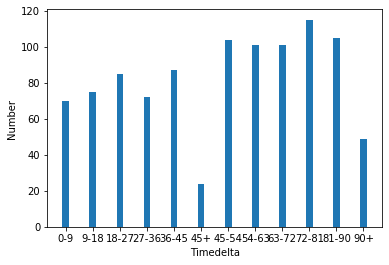


Top ten of teams that have scored in the last nine minutes:
AFC Bournemouth with 5 goals
West Ham United with 6 goals
Watford with 7 goals
Manchester City with 13 goals
Tottenham Hotspur with 5 goals
Crystal Palace with 7 goals
Liverpool with 7 goals
Chelsea with 9 goals
Manchester United with 9 goals
Arsenal with 11 goals

Players that have scored in at least eight different timedelta:
A. Lacazette
J. Vardy
\u00c1lvaro Morata
R. Lukaku
Mohamed Salah
R. Sterling
M. Arnautovi\u0107
Gabriel Jesus
Roberto Firmino
H. Kane
W. Zaha
R. Mahrez


In [28]:
# importing libraries
import json
import pandas as pd
import matplotlib.pyplot as plt

firResult = [["0-9", "9-18", "18-27", "27-36", "36-45", "45+", "45-54", "54-63", "63-72", "72-81", "81-90", "90+"], 
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
secResult = {}
thResult = {}


# import and parsing files
teams = open("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\HM2\\file json\\teams.json")
teamsJS = json.loads(teams.read())
en_events = pd.read_json("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\HM2\\file json\\events_England.json")
players = pd.read_json("C:\\Users\\asus\\Desktop\\Algoritmic methods for data science\\HM2\\file json\\players.json")

l1 = list(en_events[en_events["subEventId"] == 100]["id"])
l2 = list(en_events[en_events["subEventId"] == 35]["id"])
l3 = list(en_events[en_events["subEventId"] == 33]["id"])
lAppPar = []; lAppDef = []
lGoals = []
teamsID = {}
elRe = ""

# creating dictionaries that associate teams ids to their names
for i in range(len(teamsJS)):
    if (teamsJS[i]["area"]["name"] == "England" or teamsJS[i]["area"]["name"] == "Wales") and teamsJS[i]["type"] != "national":
        teamsID[teamsJS[i]["name"]] = teamsJS[i]["wyId"]
        secResult[teamsJS[i]["name"]] = 0

# creating a list that contain the ids of all shots
for el in l1:
    lAppPar.append(el)
for el in l2:
    lAppPar.append(el)
for el in l3:
    lAppPar.append(el)

# creating a list that contain the ids of all goals
for evId in lAppPar:
    tagEv = list(en_events[en_events["id"] == evId]["tags"])
    for i in range(len(tagEv[0])):
        if tagEv[0][i]["id"] == 101 or tagEv[0][i]["id"] == 102:
            lAppDef.append(evId)

# extracting values of interest
l = []
for evId in lAppDef:
    app = []
    app.append(int(en_events[en_events["id"] == evId]["eventSec"]))
    app.append(str(list(en_events[en_events["id"] == evId]["matchPeriod"])[0]))
    app.append(str(int(en_events[en_events["id"] == evId]["playerId"])))
    app.append(str(int(en_events[en_events["id"] == evId]["teamId"])))
    l.append(app)

for i in range(len(l)):
    if l[i][2] not in thResult.keys():
        thResult[l[i][2]] = []

# calculating results
for el in l:
    if el[1] != "1H": # all el[1] can be "1H" or "2H" (I test it)
        m = float(el[0]/60)
        if m < 9:
            firResult[1][6] += 1
            if 1 not in thResult[el[2]]:
                thResult[el[2]].append(1)
        if m >= 9 and m < 18:
            firResult[1][7] += 1
            if 2 not in thResult[el[2]]:
                thResult[el[2]].append(2)
        if m >= 18 and m < 27:
            firResult[1][8] += 1
            if 3 not in thResult[el[2]]:
                thResult[el[2]].append(3)
        if m >= 27 and m < 36:
            firResult[1][9] += 1
            if 4 not in thResult[el[2]]:
                thResult[el[2]].append(4)
        if m >= 36 and m < 45:
            firResult[1][10] += 1
            for sqName, sqId in teamsID.items():
                if sqId == int(el[3]):
                    secResult[sqName] += 1
            if 5 not in thResult[el[2]]:
                thResult[el[2]].append(5)
        if m >= 45:
            firResult[1][11] += 1
            if 6 not in thResult[el[2]]:
                thResult[el[2]].append(6)
    else:
        m = float(el[0]/60) + 45
        if m < 54:
            firResult[1][0] += 1
            if 7 not in thResult[el[2]]:
                thResult[el[2]].append(7)
        if m >= 54 and m < 63:
            firResult[1][1] += 1
            if 8 not in thResult[el[2]]:
                thResult[el[2]].append(8)
        if m >= 63 and m < 72:
            firResult[1][2] += 1
            if 9 not in thResult[el[2]]:
                thResult[el[2]].append(9)
        if m >= 72 and m < 81:
            firResult[1][3] += 1
            if 10 not in thResult[el[2]]:
                thResult[el[2]].append(10)
        if m >= 81 and m < 90:
            firResult[1][4] += 1
            if 11 not in thResult[el[2]]:
                thResult[el[2]].append(11)
        if m >= 90:
            firResult[1][5] += 1
            if 12 not in thResult[el[2]]:
                thResult[el[2]].append(12)

for i in range(10):
    m = min(secResult.values())
    for sq, goals in secResult.items():
        if goals == m:
            elRe = sq
    secResult.pop(elRe)

# showing the results of the first part
plt.xlabel("Timedelta")
plt.ylabel("Number")
plt.bar(firResult[0], firResult[1], width=0.25)
plt.show()

# showing the results of the second part
print("\nTop ten of teams that have scored in the last nine minutes:")
for sq, goals in secResult.items():
    print(sq + " with " + str(goals) + " goals")

# showing the results of the third part
print("\nPlayers that have scored in at least eight different timedelta:")
for player, goalTime in thResult.items():
    if len(goalTime) > 7:
        for i in range(len(players)):
            if players["wyId"][i] == int(player):
                print(players["shortName"][i])

### Theoretical Question

To compute the complexity of the function swapList(a, l, n) we have to consider two things: 
1. swapList(a, l, n) is a recursive function so it's complexity is given by the number of times it is called multiplied  by the complexity of the instructions included into the function 
2. given l equal to 0, we can assert that n <= len(a) otherwise the splitSwap(a, l, n) can't compute due an index out of bound error. 
The worst case for the splitSwap function occurs when n = 2^p, in this case the number of time the splitSwap will be called is:
![alt text](https://github.com/LucaUrban/ADM-HM2/blob/master/passaggioDimEsTeo.png) 
Now we have to find the complexity of the splitSwap function, this function is made by a for loop that is repeated n/2 times, so the total complexity of the function is: 
![alt text](https://github.com/LucaUrban/ADM-HM2/blob/master/compEsTeo.png)

In [2]:
def swapList(a, l, n):
    for i in range(int(n//2)):
        tmp = a[l + i]
        a[l + i] = a[l + int(n//2) + i]
        a[l + int(n//2) + i] = tmp
    print(a)
    
def splitSwap(a, l, n):
    if n <= 1:
        return
    splitSwap(a, l, n//2)
    splitSwap(a, l + (n//2), n//2)
    swapList(a, l, n)

According to the values of l and n the splitSwap(a, l, n) function does a different swapping of the list:
1. if l is equal to 0 and n is equal to len(a) this function swaps recursively all the list and returns the swapped list 
2. if l is greater than 0 and n is equal to len(a)-l only the part with index **i >= l** is swapped
3. if l is equal to 0 and n is lower than len(a) only a partition with indexes **0 <= i <= n** is swapped
4. if l is greater than 0 and n is lower to len(a)-l only the part with indexes **l <= i <= n** is swapped

The splitSwap(a, l, n) function isn't optimal because as showed before it has a computational complexity of n squared. While the function listSwap(a, l, n) displayed after returns the same swapped list, but it has a complexity of **O(n)**. 

In [11]:
def listSwap(a, l, n):
    app = []
    if l == 0:
        for i in range(n-1, -1, -1):
            app.append(a[i])
        for i in range(len(a)-n):
            app.append(a[n+i])
    else:
        for i in range(len(a)-n):
            app.append(a[i])
        for i in range(n-1, -1, -1):
            app.append(a[i+l])
    print(app)